# Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
customer_data = pd.read_csv('customer_data.csv')
churn_data = pd.read_csv('churn_data.csv')
internet_data = pd.read_csv('internet_data.csv')

In [3]:
customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [4]:
churn_data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
internet_data.columns

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

In [6]:
df1 = pd.merge(customer_data,churn_data,how='inner')

In [7]:
data = pd.merge(df1,internet_data,how='inner')

In [8]:
data.shape

(7043, 21)

In [9]:
pd.set_option('display.max_columns',None)

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No


TotalCharges datatype must be float and not category

In [11]:
data = data.drop('TotalCharges',axis=1)
l1 = []
for i in range(len(data)):
    if data['tenure'][i] != 0:
        l1.append(data['tenure'][i]*data['MonthlyCharges'][i])
    else:
        l1.append(data['MonthlyCharges'][i])
        
#Merging TotalCharges
data['TotalCharges'] = pd.Series(l1)

In [12]:
data.SeniorCitizen = data.SeniorCitizen.astype('category')

In [13]:
print(data.describe())
print('*'*60)
print(data.info())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.646039
std      24.559481       30.090047   2264.665093
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    394.000000
50%      29.000000       70.350000   1393.600000
75%      55.000000       89.850000   3786.100000
max      72.000000      118.750000   8550.000000
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null category
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7

In [14]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
TotalCharges        0
dtype: int64

# EDA

Univariate Analysis

In [15]:
data.gender.value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

The percentage of male and female are approximately same.

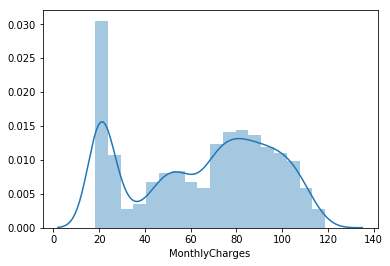

In [16]:
sns.distplot(data.MonthlyCharges)
plt.show()

(1) Most of the customers pay their monthly charges between 15-30

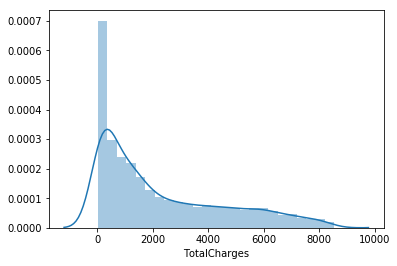

In [17]:
sns.distplot(data.TotalCharges)
plt.show()

(1) Total charges is highly right skewed.
(2) Most of the customers pay their total charges between 50-1000. 

In [18]:
data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [19]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [20]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [21]:
data.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

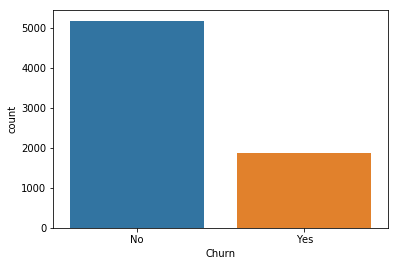

In [22]:
sns.countplot(data.Churn)
plt.show()

(1) The Classification will be biased towards Churn = 'No' because of biased data.

Bivariate Analysis

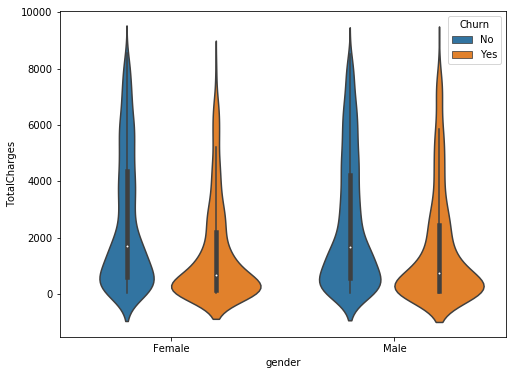

In [23]:
plt.figure(figsize=(8,6))
sns.violinplot(data.gender,data.TotalCharges,hue=data.Churn)
plt.show()

(1) Gender has no relation with churn.

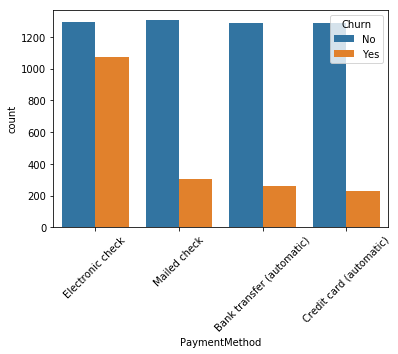

In [24]:
sns.countplot(data.PaymentMethod,hue=data.Churn)
plt.xticks(rotation=45)
plt.show()

In [25]:
pd.crosstab(data.PaymentMethod,data.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


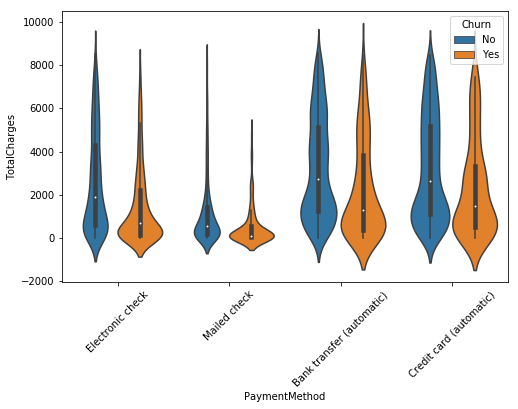

In [26]:
plt.figure(figsize=(8,5))
sns.violinplot(data.PaymentMethod,data.TotalCharges,hue=data.Churn)
plt.xticks(rotation=45)
plt.show()

(1) The customers having payment method as electronic check having higher rate of churn.

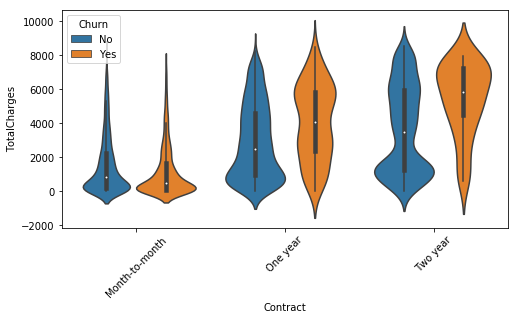

In [27]:
plt.figure(figsize=(8,4))
sns.violinplot(data.Contract,data.TotalCharges,hue=data.Churn)
plt.xticks(rotation=45)
plt.show()

In [28]:
pd.crosstab(data.Churn,data.Contract,normalize=True)

Contract,Month-to-month,One year,Two year
Churn,,,
No,0.315207,0.185574,0.233849
Yes,0.234985,0.023570,0.006815


(1) Customers having contract for very long time showed less churn rate.
(2) Customers having contract for short time means month-month often used to churn.

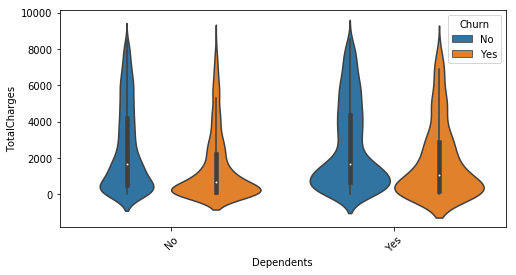

In [29]:
plt.figure(figsize=(8,4))
sns.violinplot(data.Dependents,data.TotalCharges,hue=data.Churn)
plt.xticks(rotation=45)
plt.show()

In [30]:
pd.crosstab(data.Churn,data.Dependents,normalize=True)

Dependents,No,Yes
Churn,,
No,0.481329,0.253301
Yes,0.219083,0.046287


(1) Independent customers has a higher rate of churn as compared to dependent customers.

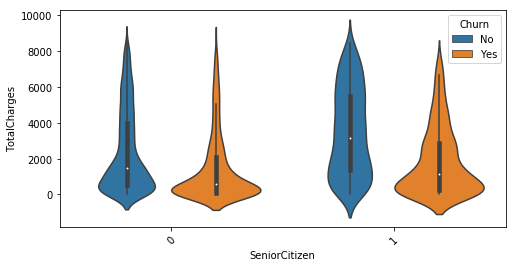

In [31]:
plt.figure(figsize=(8,4))
sns.violinplot(data.SeniorCitizen,data.TotalCharges,hue=data.Churn)
plt.xticks(rotation=45)
plt.show()

In [32]:
pd.crosstab(data.Churn,data.SeniorCitizen,normalize=True)

SeniorCitizen,0,1
Churn,,
No,0.640068,0.094562
Yes,0.197785,0.067585


(1) Non-senior citizens having higher rate of churn.

Multivariate Analysis

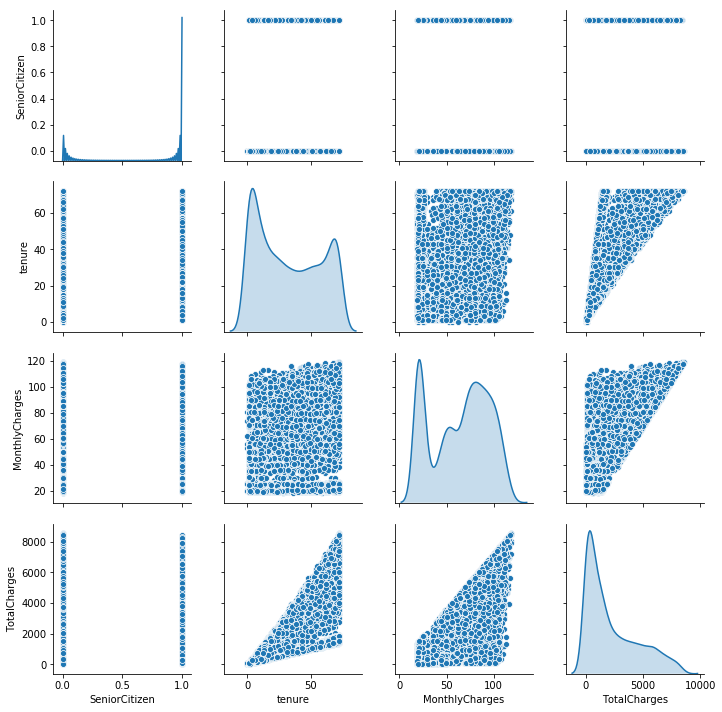

In [33]:
sns.pairplot(data,diag_kind='kde')
plt.show()

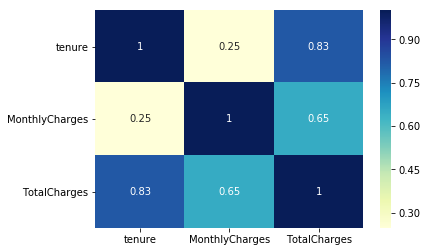

In [34]:
cor = data.corr()
sns.heatmap(cor,annot=True,cmap='YlGnBu')
plt.show()

# Model building

In [35]:
y = pd.DataFrame(data.pop('Churn'))

In [36]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [37]:
y.replace(to_replace='No',value=0,inplace=True)
y.replace(to_replace='Yes',value=1,inplace=True)

In [38]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [39]:
data_categorical = data.select_dtypes(include=['object','category'])

In [40]:
data_categorical.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,PaymentMethod,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No,Month-to-month,Yes,Electronic check,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,Yes,One year,No,Mailed check,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,Yes,Month-to-month,Yes,Mailed check,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No,One year,No,Bank transfer (automatic),No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,Yes,Month-to-month,Yes,Electronic check,No,Fiber optic,No,No,No,No,No,No


In [41]:
data_numeric = data.select_dtypes(include=['float64','int64'])

In [42]:
data_numeric.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1936.30
2,2,53.85,107.70
3,45,42.30,1903.50
4,2,70.70,141.40


In [43]:
data_categorical = data_categorical.drop(['customerID'],axis=1)

In [44]:
data_categorical_dummy = pd.get_dummies(data_categorical)

In [45]:
data_categorical_dummy.shape

(7043, 43)

In [46]:
from scipy.stats import zscore
data_numeric = data_numeric.apply(zscore)

In [47]:
x = pd.concat([data_categorical_dummy,data_numeric],axis=1)

In [48]:
x.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,-1.277445,-1.160323,-0.993505
1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0.066327,-0.259629,-0.151621
2,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,-1.236724,-0.362660,-0.959126
3,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0.514251,-0.746535,-0.166105
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,-1.236724,0.197365,-0.944245


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [50]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(criterion='entropy')
model3 = GaussianNB()

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [52]:
from sklearn.metrics import accuracy_score

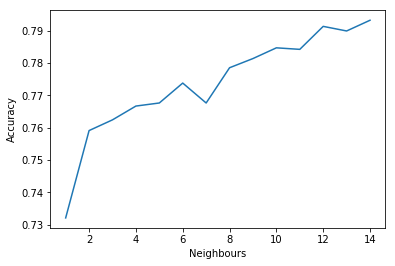

In [53]:
acc = []
for i in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    y_pred = neigh.fit(x_train,y_train).predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))
    
#Plot
plt.plot(range(1,15),acc)
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.show()

Decision Tree

In [75]:
y_pred2 = model2.fit(x_train,y_train).predict(x_test)
print(accuracy_score(y_test,y_pred2))

0.7411263606247042


In [82]:
x_col = x.columns

In [83]:
from sklearn.tree import export_graphviz
export_graphviz(model2, out_file='tree.dot', feature_names=x_col, class_names=)

In [84]:
!dot -Tpng tree.dot > tree.png # to convert the tree in a png image

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [85]:
from IPython.display import Image
Image(filename='tree.png') 

In [107]:
cd

C:\Users\SEXY


# Ensemble Techniques

In [54]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(criterion='entropy')

In [55]:
from sklearn.ensemble import BaggingClassifier
model5 = BaggingClassifier(base_estimator=model1)
model6 = BaggingClassifier(base_estimator=model2)
model7 = BaggingClassifier(base_estimator=model3)

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
model8 = AdaBoostClassifier(base_estimator=model1)
model9 = AdaBoostClassifier(base_estimator=model2)
model10 = AdaBoostClassifier(base_estimator=model3)

In [57]:
from sklearn.svm import SVC
model11 = SVC()

In [58]:
model12 = KNeighborsClassifier(n_neighbors=12)

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
model14 = GradientBoostingClassifier()
y_pred3 = model14.fit(x_train,y_train).predict(x_test)
print(accuracy_score(y_test,y_pred3))

0.7960246095598675


In [152]:
Models = []
Models.append(('Logistic Regression' , model1))
Models.append(('Decision Tree' , model2))
Models.append(('Naive Bayes' , model3))
Models.append(('Random Forest' , model4))
Models.append(('LOR_Bagging' , model5))
Models.append(('DT_Bagging' , model6))
Models.append(('NB_Bagging' , model7))
Models.append(('LOR_Adaboost' , model8))
Models.append(('DT_Adaboost' , model9))
Models.append(('NB_Adaboost' , model10))
Models.append(('SVC' , model11))
Models.append(('KNN' , model12))
Models.append(('DT_HPT', model13))
Models.append(('GBoost', model14))

In [153]:
from sklearn import model_selection

Logistic Regression: 0.804061 (0.008077)
Decision Tree: 0.732213 (0.014470)
Naive Bayes: 0.695016 (0.018432)
Random Forest: 0.777933 (0.014073)
LOR_Bagging: 0.803636 (0.008850)
DT_Bagging: 0.776088 (0.014449)
NB_Bagging: 0.695868 (0.017799)
LOR_Adaboost: 0.802214 (0.010675)
DT_Adaboost: 0.758337 (0.021931)
NB_Adaboost: 0.599322 (0.111479)
SVC: 0.801503 (0.014622)
KNN: 0.784891 (0.009722)
DT_HPT: 0.785602 (0.009859)
GBoost: 0.802924 (0.012901)


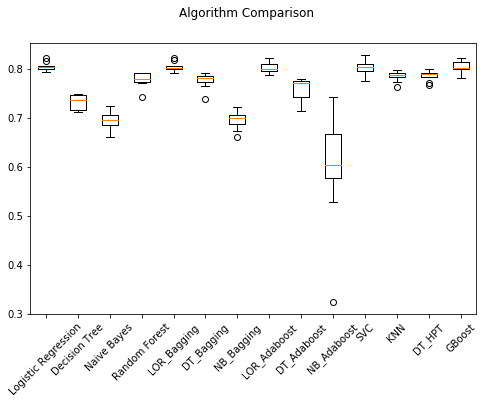

In [154]:
results = []
names = []
scoring = 'accuracy'
for name,model in Models:
    kfold = model_selection.KFold(n_splits=10,random_state=123)
    cv_score = model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(8,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()
    

Logistic Regression: 0.599196 (0.017462)
Decision Tree: 0.510861 (0.021922)
Naive Bayes: 0.595191 (0.020208)
Random Forest: 0.497482 (0.028380)
LOR_Bagging: 0.598967 (0.018940)
DT_Bagging: 0.522805 (0.032129)
NB_Bagging: 0.595464 (0.020531)
LOR_Adaboost: 0.592300 (0.025042)
DT_Adaboost: 0.518899 (0.016186)
NB_Adaboost: 0.076557 (0.119284)
SVC: 0.557104 (0.029064)
KNN: 0.547066 (0.018728)
DT_HPT: 0.569490 (0.026861)
GBoost: 0.586479 (0.017404)


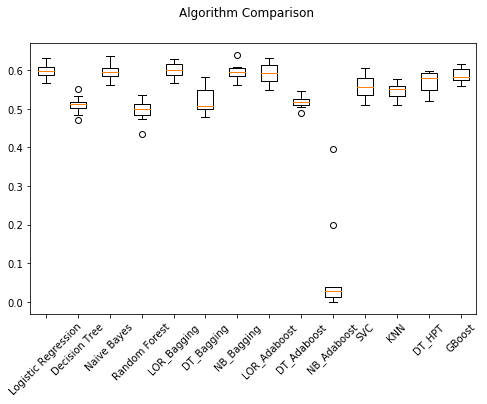

In [155]:
results = []
names = []
scoring = 'f1'
for name,model in Models:
    kfold = model_selection.KFold(n_splits=10,random_state=123)
    cv_score = model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(8,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()
    

Logistic Regression: 0.552806 (0.024855)
Decision Tree: 0.522907 (0.032979)
Naive Bayes: 0.845273 (0.029610)
Random Forest: 0.443575 (0.024931)
LOR_Bagging: 0.551013 (0.022925)
DT_Bagging: 0.454224 (0.028564)
NB_Bagging: 0.844737 (0.031209)
LOR_Adaboost: 0.542401 (0.028969)
DT_Adaboost: 0.497665 (0.031933)
NB_Adaboost: 0.121873 (0.261879)
SVC: 0.470985 (0.030744)
KNN: 0.490346 (0.026278)
DT_HPT: 0.547906 (0.046256)
GBoost: 0.527242 (0.021459)


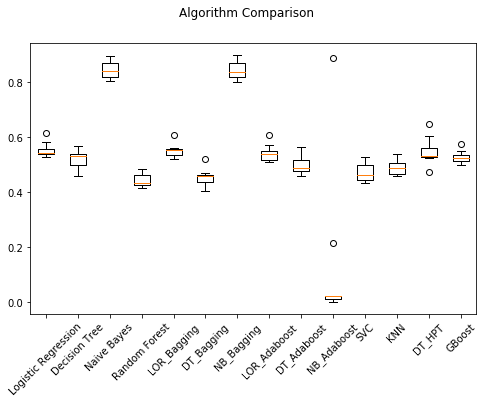

In [156]:
results = []
names = []
scoring = 'recall'
for name,model in Models:
    kfold = model_selection.KFold(n_splits=10,random_state=123)
    cv_score = model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(8,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()
    

# Hyper-parameter tunning

Decision Tree

In [66]:
model2.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

In [67]:
params = {'max_depth' : list(range(1,12)),
            'max_features':list(range(1,46)), 
            'min_samples_leaf':list(range(1,10)), 
            'min_samples_split':list(range(3,10))}

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
gd = GridSearchCV(estimator=model2,param_grid=params)

In [70]:
gd.fit(x,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
gd.best_params_

{'max_depth': 7,
 'max_features': 19,
 'min_samples_leaf': 6,
 'min_samples_split': 6}

In [61]:
model13 = DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features=21,min_samples_leaf=9,min_samples_split=8)
y_predict = model13.fit(x_train,y_train).predict(x_test)
print(accuracy_score(y_test,y_predict))

0.77520113582584


# Stacking

In [140]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [142]:
from sklearn.ensemble import VotingClassifier


eclf = VotingClassifier(estimators=[('lor', model1), ('dt', model13), ('svc', model11), ('KNN',model12)], voting='hard')

for model, label in zip([model1, model13, model11, model12, eclf], ['Logistic Regression', 'Decision Tree', 'Support Vector Classifier', 'KNeighbours', 'Ensemble']):
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.80 (+/- 0.01) [Logistic Regression]
Accuracy: 0.79 (+/- 0.01) [Decision Tree]
Accuracy: 0.80 (+/- 0.01) [Support Vector Classifier]
Accuracy: 0.79 (+/- 0.01) [KNeighbours]
Accuracy: 0.80 (+/- 0.01) [Ensemble]


In [143]:
from sklearn.ensemble import VotingClassifier


eclf = VotingClassifier(estimators=[('lor', model1), ('dt', model13), ('svc', model11), ('KNN',model12)], voting='hard')

for model, label in zip([model1, model13, model11, model12, eclf], ['Logistic Regression', 'Decision Tree', 'Support Vector Classifier', 'KNeighbours', 'Ensemble']):
    scores = cross_val_score(model, x, y, cv=5, scoring='f1')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.60 (+/- 0.02) [Logistic Regression]
Accuracy: 0.57 (+/- 0.03) [Decision Tree]
Accuracy: 0.56 (+/- 0.03) [Support Vector Classifier]
Accuracy: 0.56 (+/- 0.02) [KNeighbours]
Accuracy: 0.56 (+/- 0.03) [Ensemble]


Stacking gives an accuracy of 0.80 & F1_score of 0.56 which is less than Logistic Regression.